# 03-1 k-최근접 이웃 회귀
#### 지도 학습의 한 종류인 회귀 문제를 이해하고 k-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 알아봅시다

## k-최근접 이웃 회귀
- 지도학습은 크게 분류와 회귀(regression)로 나뉨
- 회귀 : 두 변수 사이의 상관관계를 분석하는 방법

- k-최근접 이웃 분류 : 샘플에 가까운 샘플 k개를 선택 -> 샘플 클래스를 확인 -> 다수의 클래스를 새로운 샘플의 클래스로 예측
- k-최근접 이웃 회귀 : 예측하려는 샘플에 가장 가까운 샘플(임의의 수치) k개를 선택 -> 수치의 평균을 구해 예측
  - k-최근접 이웃 분류 알고리즘과 비슷하나 타깃값을 결정할때만 조금 다름 

## 데이터 준비
- 농어의 길이가 특성, 무게가 타깃

In [3]:
import numpy as np

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

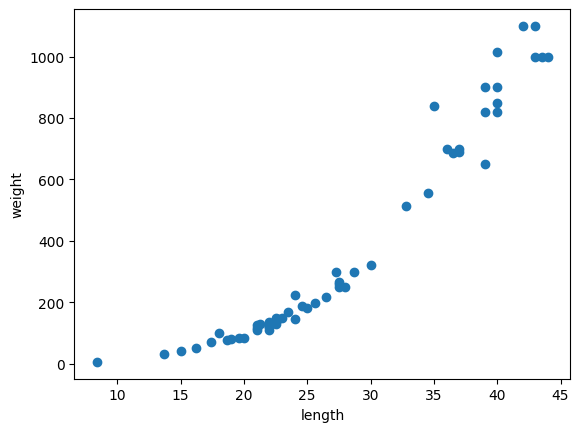

In [5]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- x축 : 특성 데이터
- y축 : 타깃 데이터

In [6]:
from sklearn.model_selection import train_test_split
# 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나누겠습니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

- 파이썬 1차원 배열의 크기는 원소가 1개인 튜플. [1,2,3]의 크기는 (3,)
- 2차원으로 만들기 위해 하나의 열 추가 (3,1)
- 넘파이 reshape() 메서드 사용하여 (4,) 배열을 (2,2) 크기로 변경 

In [7]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [8]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


- train_input의 크기는 (42,)
- 2차원 배열(42,1)로 바꾸기 위해서는 train_input.reshape(42 ,1)과 같이 사용
- 넘파이는 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미
  - reshape(-1, 1)과 같이 사용하면 배열 전체 원소 개수를 매번 외우지 않아도 되니 편리

In [7]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수(R squre, R²)
- KNeightborsRegressor() 메서드 사용

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


- 이 점수의 의미 : 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율 (정확도)
  - 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능 (임의의 수치이기 떄문)
- 회귀의 평가 : 결정계수(coefficient of determination) 혹은 R²(R-squre)
  - r-squre = 1 - (타깃-예측) 제곱의 합 / (타깃-평균) 제곱의 합
  - 예측이 타깃에 아주 가까워지면 결정계수는 1에 가까워짐
- 어렵다 .. 결정계수 ..
  - https://math100.tistory.com/120
  - https://igija.tistory.com/256
  - https://m.blog.naver.com/sharp_kiss/222624070791
  - https://recipesds.tistory.com/entry/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D-%EA%B2%B0%EA%B3%BC%EC%9D%98-%ED%95%B4%EC%84%9D%EA%B3%BC-R%C2%B2%EC%84%A4%EB%AA%85%EB%A0%A5%EC%9D%98-%EC%9D%98%EB%AF%B8-%EA%B7%B8%EB%A6%AC%EA%B3%A0-R%EC%9D%80-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98%EC%9D%98-%EC%A0%9C%EA%B3%B1-%EC%9D%91

- 다른 방법으로 타깃을 평가해보자
- 절대값 오차를 평균을 반환하는 방법이 있다
  - sklearn.metrics 패키지는 mean_absolute_error 메서드를 제공

In [9]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에에 대한 예측을 만듬
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합
- 앞에서 훈련한 모델 사용해 R-squre 점수를 확인

In [10]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 과대적합 : 훈련세트에서는 좋은점수 -> 테스트 세트는 나쁜점수
  - 훈련 세트에만 잘 맞는 모델이라는 뜻
- 과소적합 : 훈련세트보다 테스트 세트가 높음 or 두 점수가 너무 낮음
  - 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우
  - 훈련 세트가 전체 데이터를 대표한다고 가정하기 떄문에 훈련 세트를 잘 학습하는 것이 중요
 
- 앞선 예제는 훈련 세트보다 테스트 세트 점수가 높으니 과소적합임
- 해결책은?->모델을 조금 더 복잡하게 만들자 -> 훈련 세트에 더 잘 맞게 만들자
  - k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것
 
- 이웃의 개수를 줄인다 : 훈런 세트에 있는 국지적인 패턴에 민감해짐
- 이웃의 개수를 늘린다 : 데이터 전반에 있는 일반적인 패턴을 따름

- 기본 k값인 5를 3으로 줄여보자

In [11]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


- 테스트 세트 점수는 훈련 세트보다 낮아져 과소적합 문제는 해결한 듯
- 두 점수차가 크지 않아 모델이 과대적합 된 것 같지도 않음
- 이 모델이 테스트 세트와 추가될 논ㅇ어 데이터에도 일반화를 잘 하리라 예상 가능

## 회귀 문제 다루기 (문제해결 과정)
- 사이킷런은 회귀 모델의 점수로 R-squre, 즉 결정계수 값을 반환함 (1에 가까울수록 좋음)
- 정량 평가를 하고 싶다면 다른 평가 도구 사용 가능 (절대값 오차 등)

# 03-2 선형 회귀
#### k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여 가지 선형 회귀 모델을 만들어보자

### k-최근접 이웃의 한계
- 문제점을 재현해보자

In [12]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [13]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 나눔
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [14]:
# 모델을 사용해 길이가 50cm인 농어 무게 예측
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print(knr.predict([[50]]))

[1033.33333333]


- 농어 무게를 1,033g으로 예측했지만 실제로는 훨씬 많이 나감
- 산점도로 데이터를 확인해보자

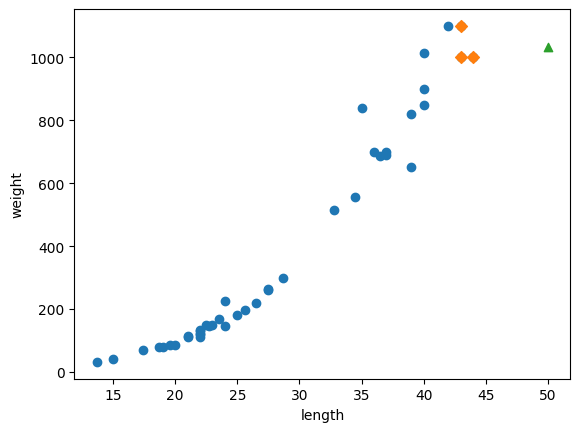

In [19]:
import matplotlib.pyplot as plt

# 50cm 농어 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 산점도에서 길이가 커질수록 농어 무게가 증가함
- 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 샘플 무게를 평균함, 평균을 구해보면 아래와 같음 

In [20]:
print(np.mean(train_target[indexes]))

1033.3333333333333


- 정확히 일치함 -> 새로운 샘플이 훈련 세트 범위를 벗어나면 엉뚱한 값을 예측함. 길이가 100cm인 농어도 1,033g으로 예측 

In [21]:
print(knr.predict([[100]]))

[1033.33333333]


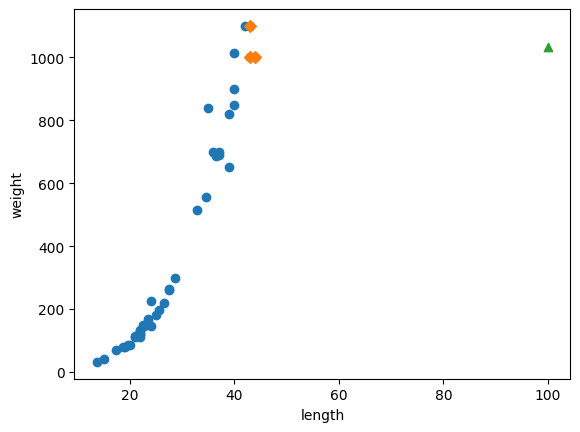

In [22]:
# 100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀
- 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음에 배우는 머신러닝 알고리즘 중 하나
- 사이킷런은 sklearn.linear_model 패키지 아래 LinearRegression 클래스로 선형 회귀 알고리즘을 구현

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


- LinearRegression 클래스가 찾은 a와 b는 lr 객체의 coef_와 intercept_ 속성에 저장되어 있음
- 머신러닝에서 기울기를 종종 계수 (coefficient), 또는 가중치(weight)라고 부름 (coef_)

In [25]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- 모델 파라미터 (model parameter) : 머신러닝 알고리즘이 찾은 값이라는 의미 (coef_, intercept_ .. )
  - 이 책에서 사용하는 많은 머신러닝 알고리즘 훈련 과정은 최적 모델 파라미터를 찾는 것
  - 이를 모델 기반 학습이라고 부름
- 사례 기반 학습 : k-최근접 이웃과 같이 모델 파라미터가 없는 것

- 농어의 길이 15 - 50까지 직선으로 그려보고 절편을 사용하여 두 점을 이어보자 (훈련세트 산점도와 함꼐 그려봅니다)

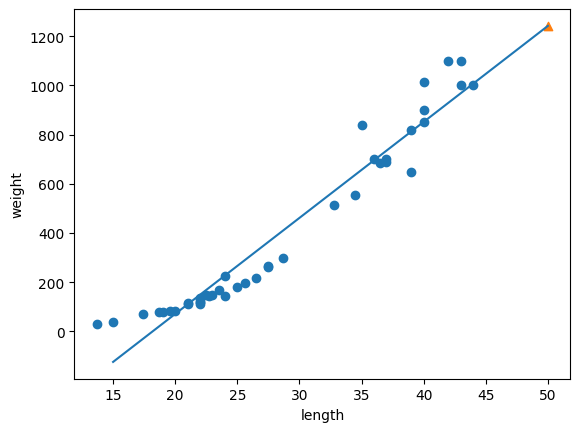

In [28]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 오 이제 훈련 세트 범위를 벗어난 농어의 무게도 예측 가능!
- 이전 절과 같이 훈련 세트와 테스트 세트에 대한 R-squre 점수를 확인

In [29]:
print(lr.score(train_input, train_target)) # 훈련세트
print(lr.score(test_input, test_target)) # 테스트세트

0.9398463339976041
0.824750312331356


- 전체적으로 과소적합되었다고 판단. 
- 왼쪽 하단 농어 무게는 0g 이하로 내려갈 것으로 판단 .. 

## 다항 회귀
- 데이터가 곡선 모양이니 최적의 곡선을 찾아보자
- 2차항의 데이터를 만들어보자

In [31]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

- train_input ** 2 식에도 넘파이 브로드캐스팅이 적용됨
- 새롭게 만든 데이터셋을 확인

In [32]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


- 워낼 특성인 길이를 제곱하여 왼쪽 열에 추가하였기 때문에 훈련 세트, 테스트 세트 모두 열이 2개로 늘어남

In [34]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


- 이 모델은 다음과 같은 그래프를 학습함
- 무게 = 1.01 X 길이제곱 - 21.6 X 길이 + 116.05
  - 2차 방정식이 회귀인 이유? : X제곱을 다른 값으로 치환하여 1차 방정식을 만들수 있기 때문이다 ..
- 이런 방정식을 다항식(polynomial)이라 부르며 다항식을 사용한 선형 회귀를 다항 회귀라고 부릅니다.
  - 2차 방정식의 계수와 절편 a, b, c를 알았으니 훈련 세트의 산점도에 그래프로 그려봐요

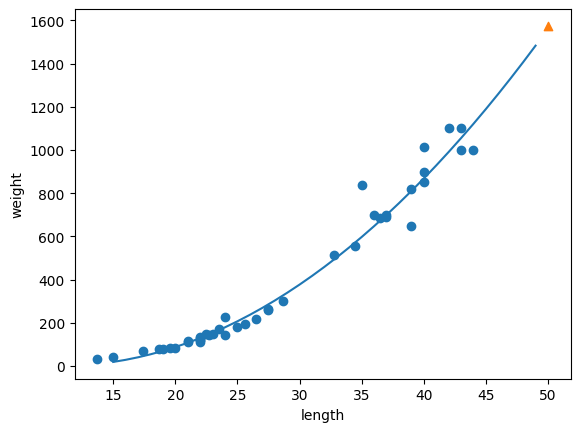

In [36]:
# 구간별 직선을 그리기 위해 15~49까지 정수 배열을 만듦
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 직선이 잘 그려진 것 같으니 R-squre 점수를 평가해보겠습니다.

In [37]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


- 훈련 세트와 테스트 세트 점수가 높아짐
- 여전히 테스트 세트 점수가 높음. 과소적합이 있는 것 같음

## 선형 회귀로 훈련 세트 범위 밖의 샘플 예측
- k-최근접 회귀의 문제는 범위 밖 샘플 예측이 부정확하다는 점
- 가장 잘 맞는 직선의 방정식을 찾는다는 것은 최적의 기울기와 절편을 구한다는 것을 의미 (coef_, intercept_ 속성에 저장되어있음)

# 03-3 특성 공학과 규제
#### 여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용해봅니다. 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배웁니다.

## 다중 회귀

- 다중 회귀(multiple regression) : 1개 이상의 특성을 사용하여 직선 이상의 면적을 학습하는 것
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성 공학(feature engineering)이라고 부름

### 데이터 준비
- 판다스 데이터프레임으로 데이터 가져오기

In [43]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [44]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [45]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

- 위의 데이터를 사용하여 새로운 특성을 만들겠습니다. 

## 사이킷런의 변환기
- 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공
- 이런 클래스를 변환기(trainsformer)라고 부름
- 변환기 클래스는 fit(), transform(0 메서드를 제공
- 앞서배운 LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimator)라고 부름

- 우리가 사용할 변환기는 PolymomialFeatures 클래스임

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
# 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보겠습니다 
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


- 훈련(fit)을 해야 변환(transform)이 가능합니다. 두 메서드를 하나로 붙인 fit_transform 메서드도 있습니다.

- fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데이터를 변환
- PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가합니다.
- 무게 = a X 길이 + b X 높이 + c X 두께 + d X 1

- 선형 모델은 자동으로 절편을 추가하므로 굳이 특성을 만들 필요가 없음
- include_bias=False로 지정하여 특성을 변환

In [55]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


- include_bias=False로 지정하지 않아도 자동으로 특성에 추가된 절편 항을 무시하지만 혼돈을 피하기 위해 명시적으로 지정

In [58]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [59]:
print(train_poly.shape)

(42, 9)


- PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 방법을 제공 (get_feature_names_out() 메서드 호출)

In [60]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [70]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기
- 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같음
- 다른점은 여러개의 특성을 사용하여 선형 회귀를 수행함
- LinearRegression 클래스를 임포트하고 앞서 만든 train_poly를 사용해 모델 훈련

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [69]:
print(lr.score(train_poly, train_target))

0.9903183436982125


In [72]:
# 테스트 세트 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594168


- 테스트 세트 점수는 높아지지 않았지만, 농어 길이만 사용했을 때 있던 과소적합 문제는 나타나지 않음

- 특성을 더 많이 추가하면 어떨까요? 3제곱, 4제곱 항을 넣어보고 5제곱까지 특성을 만들어 출력해보겠습니다.

In [73]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [74]:
print(train_poly.shape)

(42, 55)


In [77]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999989608


- 트레인 세트는 완벽!
- 테스트 세트를 볼까

In [78]:
print(lr.score(test_poly, test_target))

-144.4049046409093


- 특성 개수를 늘리면 선형 모델은 강력해짐. 하지만 훈련 세트 과대적합되므로 테스트 세트에서는 나쁜 점수를 얻게 됨
- 이 문제를 해결하기 위해선 다시 특성을 줄여야함

## 규제
- 규제(regularization) : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말함 -> 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
  - 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일
- 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여 보겠습니다.

- 특성 스케일에 대한 이야기
  - 특성의 스케일이 정규화되지 않으면 곱해지는 계수 값도 차이나게 됨
  - 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않음
  - 정규화!
  - 사이킷렁에서는 StandardScaler 클래스를 사용해보겠습니다.

In [79]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- PolynomialFeatures 클래스로 만든 train_poly를 사용해 객체를 훈련합니다.
- 꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 합니다.
- train_scaled와 test_scaled가 준비되었습니다.

- 선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부릅니다.
- 릿지 : 계수를 제곱한 값을 기준으로 규제 적용
- 랏소 : 계수의 절대값을 기준으로 규제 적용

- 일반적으로 릿지 선호

## 릿지 회귀

In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


- 선형 회귀에서의 점수가 조금 낮아짐
- 테스트 세트를 보아요

In [81]:
print(ridge.score(test_scaled, test_target))

0.9790693977615388


- 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절합니다.
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 주리고 조금 더 과소적합되도록 유도합니다.

### 사람이 지정해야 하는 매개변수
- alpha 값은 릿지 모델이 학습하는 값이 아닌 우리가 사전에 지정하는 값.
- 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 부름
- 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현됨
- 이 책에서는 함수와 클래스의 파라미터는 매개변수라고 하고 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미터)는 그대로 파라미터라고 표현

- 적절한 alpha 값을 찾는 한가지 방법은 alpha 값에 대한 R-squre 값의 그래프를 그려보는 것
- 후련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨

In [84]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

- alpha 값을 0.001에서 100까지 늘려가며 릿지 회귀 모델을 훈련한 다음 리스트에 저장

In [85]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

- 이제 그래프를 그려보자

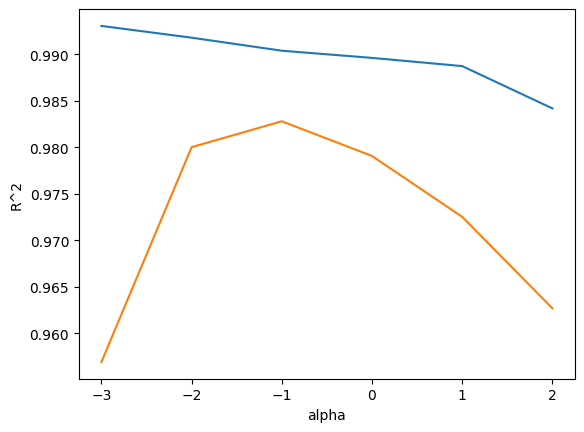

In [86]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 위는 훈련 세트, 아래는 테스트 세트 그래프
- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트 점수가 가장 높은 -1 인 것으로 추정

In [87]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386955


## 라쏘 회귀
- 릿지와 매우 비슷

In [88]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [89]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


- 테스트 세트도 릿지만큼 좋습니다.
- alpha 값을 바꾸어가며 훈련 세트와 테스트 세트에 대한 점수를 계산하겠습니다.

In [90]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/jeremy/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/jeremy/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


- ConvergenceWaring이 발생할 수 있음 : 반복횟수가 부족할 떄 발생 max_iter 매개변수 값으로 조정 가능

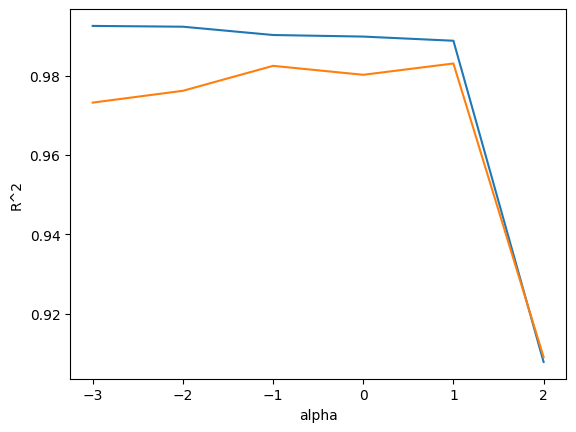

In [91]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 그래프에서 왼쪽은 과대적합을 보여주고 있고, 가장 오른쪽은 점수가 크게 떨어짐
- 라쏘 모델에서 최적의 alpha 값은 1임

In [92]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [93]:
print(np.sum(lasso.coef_ == 0))

40
